<a href="https://colab.research.google.com/github/karol10542/Podstawy_nauki_o_danych/blob/main/daneq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
my_own_dataset = pd.DataFrame({'Col1':range(5),
                               'Col2':[1.0]*5,
                               'Col3':1.0,
                               'Col4':'Witaj, świecie!'})

In [3]:
my_own_dataset


,Col1,Col2,Col3,Col4
0,0,1.0,1.0,"Witaj, świecie!"
1,1,1.0,1.0,"Witaj, świecie!"
2,2,1.0,1.0,"Witaj, świecie!"
3,3,1.0,1.0,"Witaj, świecie!"
4,4,1.0,1.0,"Witaj, świecie!"


In [6]:
my_own_dataset.dtypes #sprawdzamy typy kolumn

Col1      int64
Col2    float64
Col3    float64
Col4     object
dtype: object

In [7]:
#jak zmienic typ danych:
my_own_dataset['Col1'] = my_own_dataset['Col1'].astype(float)

In [8]:
my_own_dataset.dtypes

Col1    float64
Col2    float64
Col3    float64
Col4     object
dtype: object

In [9]:
my_own_dataset

,Col1,Col2,Col3,Col4
0,0.0,1.0,1.0,"Witaj, świecie!"
1,1.0,1.0,1.0,"Witaj, świecie!"
2,2.0,1.0,1.0,"Witaj, świecie!"
3,3.0,1.0,1.0,"Witaj, świecie!"
4,4.0,1.0,1.0,"Witaj, świecie!"


In [11]:
iris_filename = '/content/Iris.csv'
iris = pd.read_csv(iris_filename,sep=',',decimal='.',header=None,names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [12]:
#stosowanie maski
iris.dtypes

sepal_length    object
sepal_width     object
petal_length    object
petal_width     object
target          object
dtype: object

In [13]:
mask_feature =iris['sepal_length'] > '6.0'
mask_feature

Id      True
1      False
2      False
3      False
4      False
       ...  
146     True
147     True
148     True
149     True
150    False
Name: sepal_length, Length: 151, dtype: bool

In [14]:
#zamiana wartosci target==iris virginia na nowa wartosc za pomoca .loc
mask_target =iris['target'] =='Iris_virginia'
iris.loc[mask_target,'target'] == 'test0'

Series([], Name: target, dtype: bool)

In [15]:
#wyswietla opisy
iris['target'].unique()

array(['Species', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [17]:
#funkcja .apply pozwala wykonywac dowolne operacje na wierszach lub kolumnach.
import numpy as np
iris.apply(np.count_nonzero,axis=1).head()

Id    5
1     5
2     5
3     5
4     5
dtype: int64

In [18]:
#aby ustalic liczbe niezerowych elementow dla cech
iris.apply(np.count_nonzero,axis=0)

sepal_length    151
sepal_width     151
petal_length    151
petal_width     151
target          151
dtype: int64

In [19]:
#ustalamy dlugosc znakow kazdej komorki, zaczynamy od rzutowania wszystkich komorek na lancuch znakow
iris.applymap(lambda el:len(str(el))).head()

,sepal_length,sepal_width,petal_length,petal_width,target
Id,13,12,13,12,7
1,3,3,3,3,11
2,3,3,3,3,11
3,3,3,3,3,11
4,3,3,3,3,11


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [27]:
data = pd.read_csv('/content/housing.csv', header = None, delim_whitespace=True)
data.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','MEDV']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


CRIM - wskaźnik przestępczości na mieszkańca według miast
ZN - udział działek mieszkaniowych przeznaczonych dla działek powyżej 25.000 stóp kwadratowych.
INDUS - odsetek akrów działalności niedetalicznej na miasto.
CHAS - Zmienna fikcyjna Charles River (1, jeśli droga ogranicza rzekę; 0 w przeciwnym razie)
NOX - stężenie tlenków azotu (części na 10 mln)
RM - średnia liczba pokoi na mieszkanie
WIEK - odsetek jednostek własnościowych wybudowanych przed 1940
DIS - ważone odległości do pięciu bostońskich centrów zatrudnienia
RAD - wskaźnik dostępności do autostrad radialnych
TAX - pełna stawka podatku od nieruchomości za 10 000 USD
PTRATIO - stosunek uczniów do nauczycieli według miasta
B - 1000(Bk - 0,63)^2 gdzie Bk to odsetek osób czarnoskórych według miast
LSTAT - % niższy stan ludności
MEDV - Mediana wartości domów zajmowanych przez właścicieli w 1000 USD

In [28]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


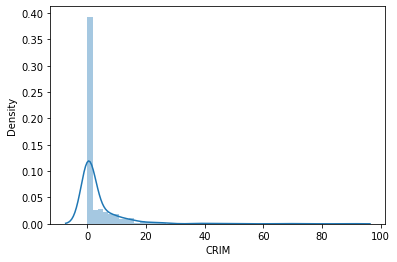

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


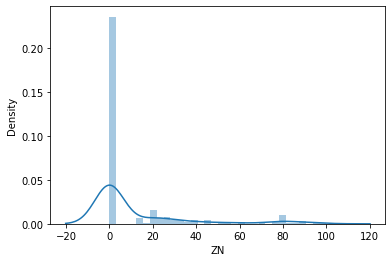

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


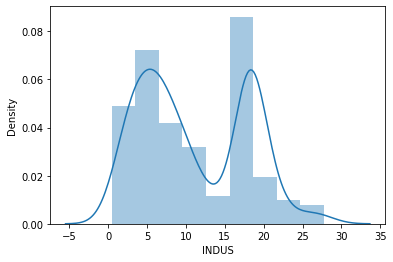

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


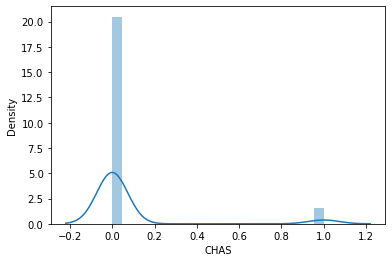

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


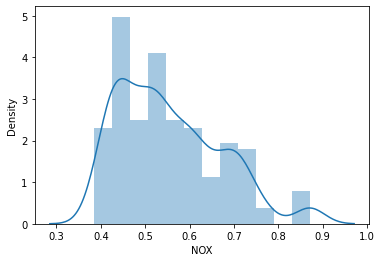

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


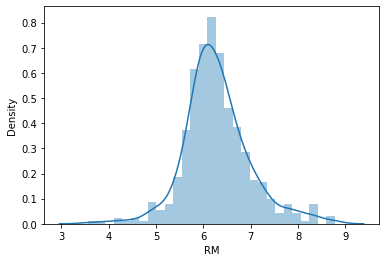

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


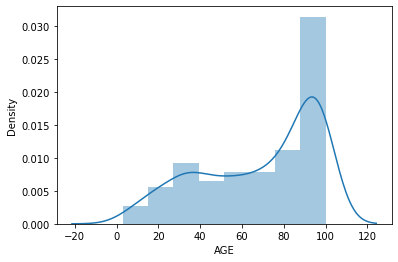

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


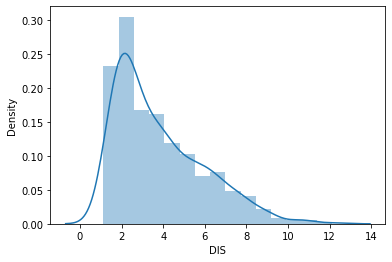

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


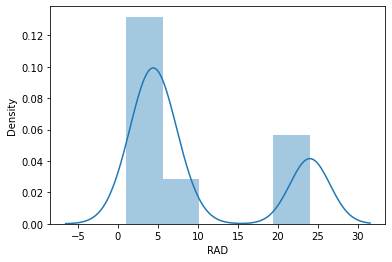

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


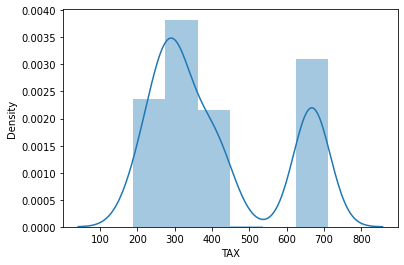

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


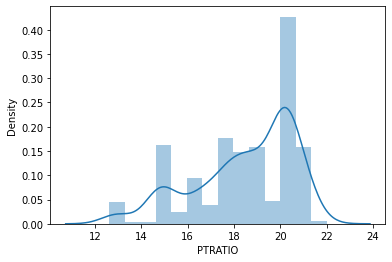

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


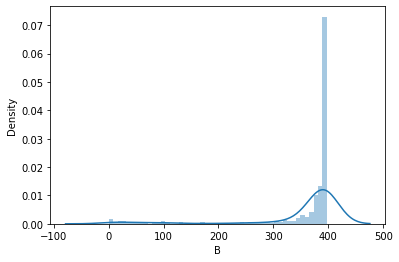

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


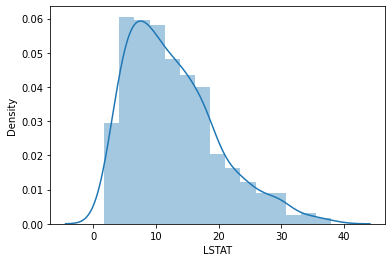

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


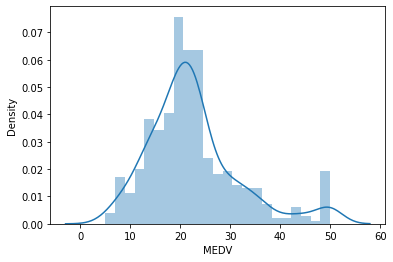

In [29]:
for column in data.columns:
    sns.distplot(data[column])
    plt.show()

In [31]:
data.columns[1]

'ZN'

In [32]:
data.columns[1:3]

Index(['ZN', 'INDUS'], dtype='object')